In [1]:
library(tidyverse)
library(repr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [13]:
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")
head(players_data)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Data Description: 
-

- In the players dataset there are 196 observations, with 7 variables (experience, subscribe, hashedEmail, played_hours, name, gender, and Age.
- Experience, name, and gender are character variables, played_hours and Age are numerical variable (dbl), and subscribe is a logical variable (lgl)
- In Sessions dataset, there are 1535 observations, with 5 variables (hashedEmail, start_time, end_time, origional_start_time, and origional_end_time)
- hashedEmail, start_time, and end_time are character variables (chr). origional_start_time and origional_end_time are numerical variables(dbl)
- All variables are fairly straighforward but the start and end time variables are slightly unusual. The start_time and end_time variables are written in "standard" format whereas the origional_start_time and origional_end_time are written in standardized format which will allow us to graph easier.
- There are 2 main problems that could arise. Firstly, most entries are less than 25, but there are a number of outliers that are well above 150. These outliers should be included in our analysis, but it may make reading certain plots very difficult. Secondly, there are some entries with zero hours of playtime. I would not want to include this data because it could skew the results. If we wish to analyze how playtime affects something, we should omit zero values.



Questions:
-

Does experience or subscription status predict played_hours in players.csv dataset?

I will create bar graphs with either subscription status or experience on the x-axis and average played_hours on the y-axis. This will allows us to easily visualize trends present in the dataset

Exploratory Data Analysis and Visualization
-

In [19]:
mean_table <- players_data |>
  summarise(across(where(is.numeric), ~mean(.x, na.rm = TRUE)))

mean_table

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


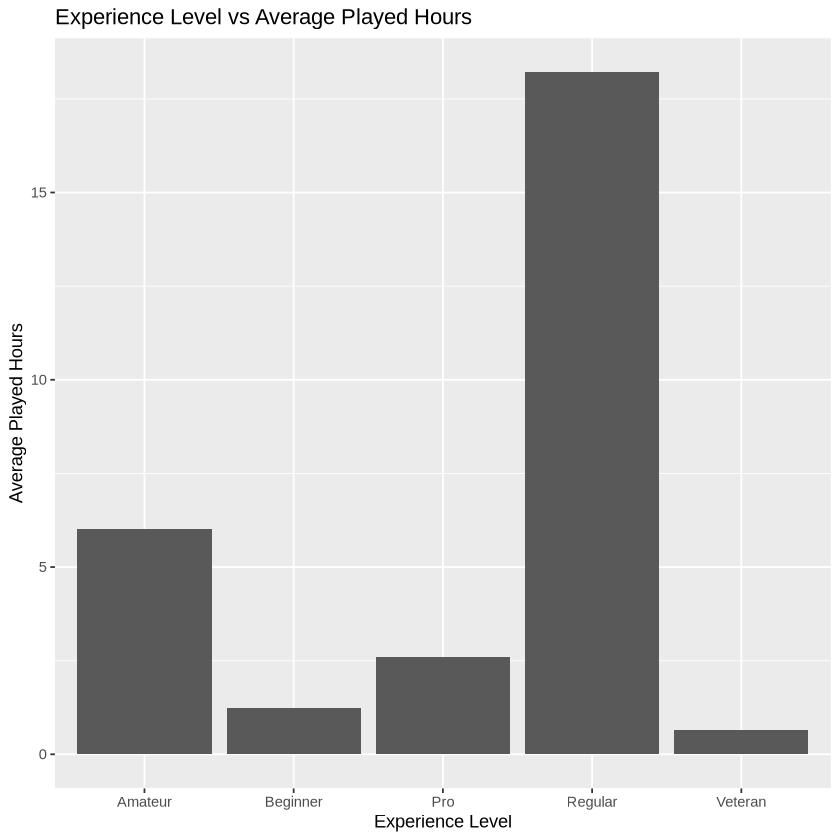

In [51]:
avg_hours <- players_data |>
  group_by(experience) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

avg_hours_plot <- ggplot(avg_hours, aes(x = experience, y = mean_played_hours)) +
  geom_bar(stat = "identity") +
  labs(x = "Experience Level",
    y = "Average Played Hours",
      title = "Experience Level vs Average Played Hours")
avg_hours_plot

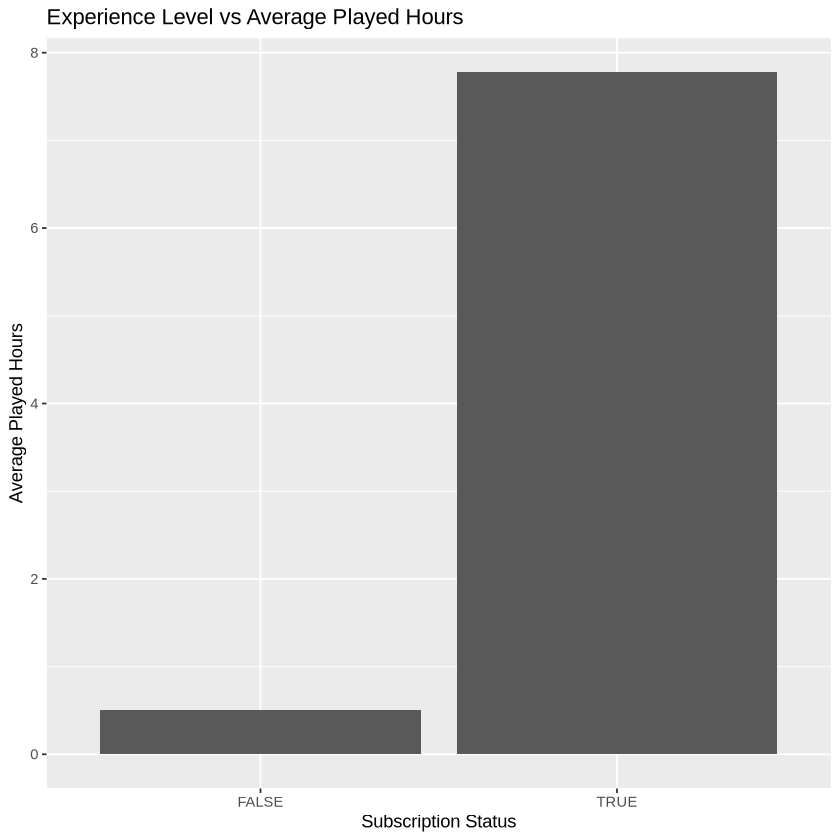

In [46]:
avg_sub <- players_data |>
  group_by(subscribe) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

avg_sub_plot <- ggplot(avg_sub, aes(x = subscribe, y = mean_played_hours)) +
  geom_bar(stat = "identity") +
  labs(x = "Subscription Status",
    y = "Average Played Hours",
      title = "Experience Level vs Average Played Hours")
avg_sub_

In the experience level vs average played hours plot, we can see that Regular players tended to play the most, and veterans tended to play the least. 

In the ex